In [2]:
import numpy as np

In [3]:
X = np.array([[73, 67, 43], 
                   [91, 88, 64], 
                   [87, 134, 58], 
                   [102, 43, 37], 
                   [69, 96, 70]], dtype='float32')

In [4]:
Y = np.array([[56], 
                    [81], 
                    [119], 
                    [22], 
                    [103]], dtype='float32')

In [5]:
mu = np.mean(X, 0)
sigma = np.std(X, 0)
#normalizing the input
X = (X-mu) / sigma
X = np.hstack((np.ones((Y.size,1)),X))
print(X.shape)

(5, 4)


In [6]:

# Weights and biases
rg = np.random.default_rng(34)
w = rg.random((1, 4))
print(w)

[[0.00402824 0.87217691 0.24274239 0.6510613 ]]


In [7]:
def mse(t1, t2):
    diff = t1 - t2
    return np.sum(diff * diff) / diff.size

In [10]:
# Compute error
preds = model(X,w)
cost_initial = mse(preds, Y)
print("Cost before regression: ",cost_initial)

Cost before regression:  6965.687225134663


In [9]:
def model(x,w):
    return x @ w.T

In [11]:
def gradient_descent(X, y, w, learning_rate, n_iters):
    J_history = np.zeros((n_iters,1))
    for i in range(n_iters):
        h = model(X,w)
        diff = h - y
        delta = (learning_rate/Y.size)*(X.T@diff)
        new_w = w - delta.T
        w=new_w
        J_history[i] = mse(h, y)
    return (J_history, w)

In [12]:
import matplotlib.pyplot as plt
n_iters = 500
learning_rate = 0.01

initial_cost = mse(model(X,w),Y)

print("Initial cost is: ", initial_cost, "\n")

(J_history, optimal_params) = gradient_descent(X, Y, w, learning_rate, n_iters)

print("Optimal parameters are: \n", optimal_params, "\n")

print("Final cost is: ", J_history[-1])

Initial cost is:  6965.687225134663 

Optimal parameters are: 
 [[75.6993559  -4.31969852 23.93267918 10.69533093]] 

Final cost is:  [3.35525689]


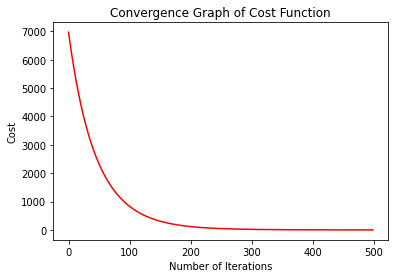

In [13]:
plt.plot(range(len(J_history)), J_history, 'r')

plt.title("Convergence Graph of Cost Function")
plt.xlabel("Number of Iterations")
plt.ylabel("Cost")
plt.show()

In [14]:
preds = model(X,optimal_params)
cost_final = mse(preds, Y)
# Print predictions
print("Prediction:\n",preds)
# Comparing predicted with targets
print("Targets:\n",Y)

Prediction:
 [[ 55.37952197]
 [ 83.43974883]
 [115.96661383]
 [ 20.9565498 ]
 [102.75434433]]
Targets:
 [[ 56.]
 [ 81.]
 [119.]
 [ 22.]
 [103.]]


In [15]:
print("Cost after linear regression: ",cost_final)
print("Cost reduction percentage : {} %".format(((cost_initial- cost_final)/cost_initial)*100))

Cost after linear regression:  3.3375867988530823
Cost reduction percentage : 99.95208531920856 %
